In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("L12_COMBO.xlsx")

final_merged_df = df.groupby('Stock Code', as_index=False)['ZSCORE_FINAL'].mean()

final_merged_df.head(40)

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)



In [3]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2012-03-31")
end_date = pd.to_datetime("2015-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False) 





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['A2ZINFRA', 'ADANIPOWER', 'AEGISLOG', 'BAJAJCON', 'DBREALTY', 'EDELWEISS', 'FEL', 'FORTIS', 'GODREJCP', 'GREENPOWER', 'INDUSINDBK', 'JPPOWER', 'JYOTHYLAB', 'LICHSGFIN', 'MANAPPURAM', 'MOTHERSON', 'PFS', 'POONAWALLA', 'SYMPHONY', 'THOMASCOOK', 'TRITURBINE', 'VAKRANGEE', 'VEDL']


C:\Users\meets\AppData\Local\Temp\ipykernel_16420\3434070535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_16420\3434070535.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,A2ZINFRA,ADANIPOWER,AEGISLOG,BAJAJCON,DBREALTY,EDELWEISS,FEL,FORTIS,GODREJCP,...,LICHSGFIN,MANAPPURAM,MOTHERSON,PFS,POONAWALLA,SYMPHONY,THOMASCOOK,TRITURBINE,VAKRANGEE,VEDL
0,2012-04-03,0.078801,0.027697,0.006667,0.017366,-0.004499,0.074653,0.095051,-0.015802,-0.010795,...,0.008459,0.099369,-0.008902,0.024615,0.012726,0.065653,-0.039080,-0.037500,0.038328,0.030366
1,2012-04-04,-0.026995,0.028369,-0.006623,0.084513,-0.010169,-0.051696,0.043999,0.027095,-0.002425,...,-0.003355,0.030129,0.002994,-0.012012,0.003968,-0.010143,0.018341,0.069264,0.043624,-0.019144
2,2012-04-09,-0.036720,-0.013103,0.013333,-0.025720,-0.042237,-0.028961,-0.043578,-0.010747,0.010331,...,-0.028053,-0.041783,-0.023881,0.003040,-0.034256,0.003795,-0.000783,0.007085,-0.009646,-0.041346
3,2012-04-10,0.006777,0.014675,-0.003289,-0.005516,0.012515,0.110526,0.009892,-0.006420,-0.011429,...,0.010198,0.023256,-0.006116,-0.006061,-0.032060,-0.017391,0.123824,0.015075,-0.016234,-0.017680
4,2012-04-11,-0.024401,-0.022727,-0.023102,-0.028922,-0.005886,-0.047393,-0.004749,-0.018390,-0.004868,...,0.018857,-0.029830,0.006154,-0.009146,-0.013390,-0.015775,-0.025105,-0.033663,-0.013201,-0.021271


In [4]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()



# Step 1: Initial weights from Z-score
final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()

# Step 2: Cap and redistribute iteratively
cap = 0.07
weights = final_df['PORTFOLIO_WEIGHTS'].copy()

while True:
    over_cap = weights > cap
    if not over_cap.any():
        break  # Exit loop if no weights are over the cap

    # Cap the overweight stocks
    weights[over_cap] = cap

    # Redistribute the excess weight
    total_weight = weights.sum()
    excess = 1.0 - total_weight

    # Identify stocks eligible to receive excess (not capped)
    under_cap = weights < cap
    allocatable = weights[under_cap]
    scaling_sum = allocatable.sum()

    if scaling_sum == 0:
        break  # Avoid divide by zero

    # Distribute excess proportionally
    weights[under_cap] += (allocatable / scaling_sum) * excess

final_df['PORTFOLIO_WEIGHTS'] = weights

# Final checks (optional)
print("Max weight:", final_df['PORTFOLIO_WEIGHTS'].max())  # Should be <= 0.07
print("Total weight:", final_df['PORTFOLIO_WEIGHTS'].sum())  # Should be ~1.0


final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)


final_df.to_csv("L12_COMBO_OP_NEW.csv",index=False)

Max weight: 0.07
Total weight: 0.9999999999999997


C:\Users\meets\AppData\Local\Temp\ipykernel_16420\102548513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()
C:\Users\meets\AppData\Local\Temp\ipykernel_16420\102548513.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = weights


In [5]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              743 non-null    datetime64[ns]
 1   Portfolio Return  743 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [6]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("L12_COMBO_FINAL_NEW.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2012-04-03   2012-04-03
End Period                 2015-04-01   2015-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          64.32%       93.33%
CAGR﹪                     12.13%       16.41%

Sharpe                     1.25         1.18
Prob. Sharpe Ratio         98.3%        97.81%
Smart Sharpe               1.02         0.97
Sortino                    1.82         1.71
Smart Sortino              1.49         1.4
Sortino/√2                 1.29         1.21
Smart Sortino/√2           1.05         0.99
Omega                      1.21         1.21

Max Drawdown               -16.59%      -37.14%
Longest DD Days            319          494
Volatility (ann.)          14.36%       20.75%
R^2                        0.63         0.63
Information Ratio          0.03         0.03
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-01-08,2013-08-06,2014-05-16,494,-37.144125,-35.709866
2,2014-09-12,2014-10-16,2014-11-11,61,-11.321995,-10.902152
3,2015-03-04,2015-03-26,2015-04-01,29,-11.095015,-11.024758
4,2012-04-20,2012-05-14,2012-09-20,154,-10.466054,-10.018201
5,2014-11-19,2014-12-17,2014-12-30,42,-8.826245,-8.031568


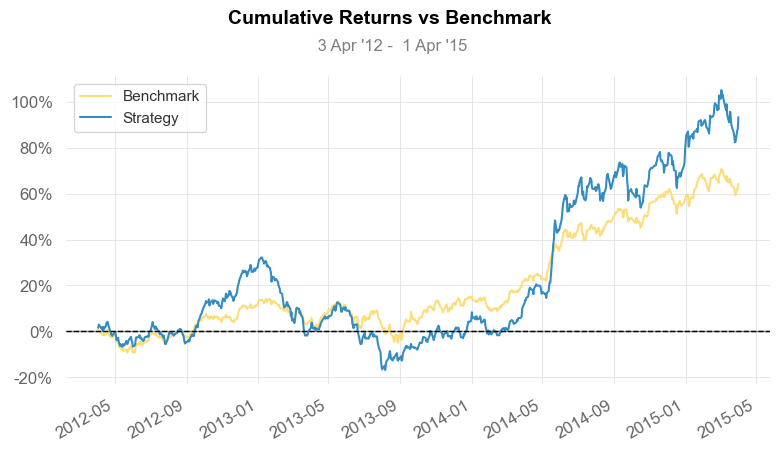

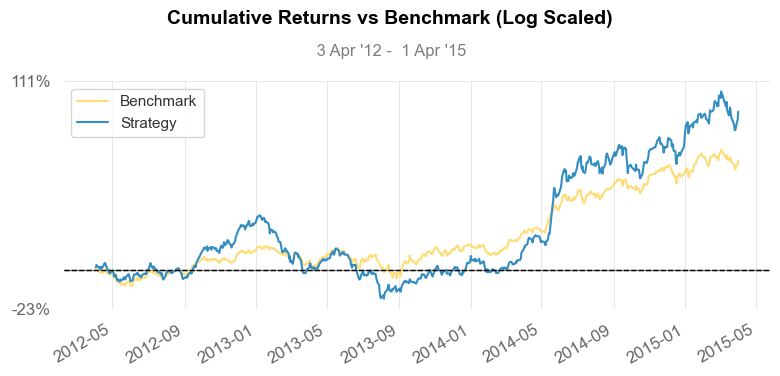

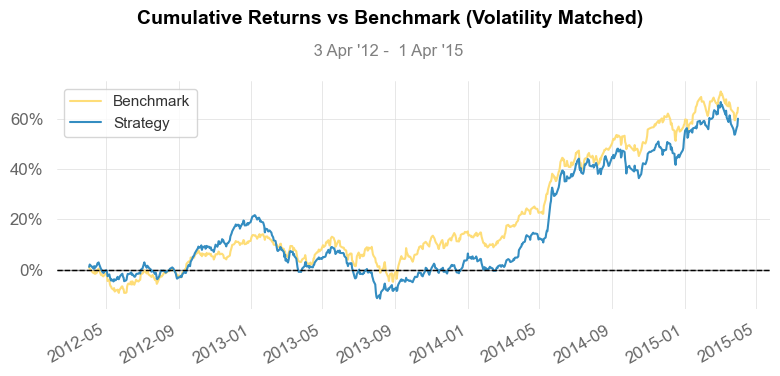

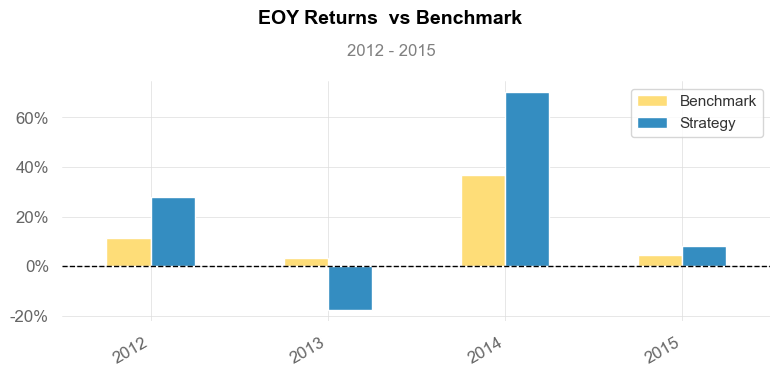

OptionError: No such keys(s): 'mode.use_inf_as_null'

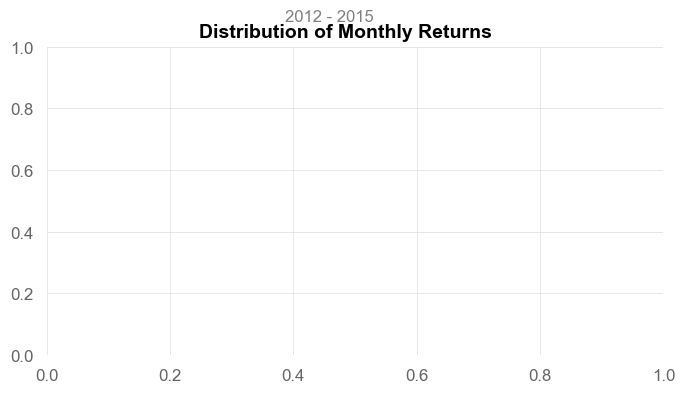

In [7]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")